# Flexible


run code to check versions or whatever

In [3]:
import keras
print(keras.__file__)

c:\Users\Faizan Tabassum\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\__init__.py


# Import Libraries


Importing necessary libraries and modules required to build the classification model.

In [16]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

# Load Dataset

Initializing a few parameters required for the image dataset preprocessing.

In [6]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((256, 256))

# Number of images used to train the model
N_IMAGES = 500

# Path to the dataset folder
root_dir = 'C:/Users/Faizan Tabassum/Desktop/GardenWatch/PlantVillage-Dataset/data_distribution_for_SVM'

train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

We use the function `convert_image_to_array` to resize an image to the size `DEFAULT_IMAGE_SIZE` we defined above.

In [7]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

Here, we load the training data images by traversing through all the folders and converting all the images and labels into separate lists respectively.

*NOTE: We use a small portion of the entire dataset due to the computing limitations. Tweak `N_IMAGES` to include entire dataset.*

In [8]:
image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    plant_disease_folder_list = listdir(train_dir)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{train_dir}/{plant_disease_folder}/")

        for image in plant_disease_image_list[:N_IMAGES]:
            image_directory = f"{train_dir}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

# Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print()

# Check the number of images loaded for training
image_len = len(image_list)
print(f"Total number of images: {image_len}")

[INFO] Loading images ...
[INFO] Processing 0 ...
[INFO] Processing 1 ...
[INFO] Processing 10 ...
[INFO] Processing 11 ...
[INFO] Processing 12 ...
[INFO] Processing 13 ...
[INFO] Processing 14 ...
[INFO] Processing 15 ...
[INFO] Processing 16 ...
[INFO] Processing 17 ...
[INFO] Processing 18 ...
[INFO] Processing 19 ...
[INFO] Processing 2 ...
[INFO] Processing 20 ...
[INFO] Processing 21 ...
[INFO] Processing 22 ...
[INFO] Processing 23 ...
[INFO] Processing 24 ...
[INFO] Processing 25 ...
[INFO] Processing 26 ...
[INFO] Processing 27 ...
[INFO] Processing 28 ...
[INFO] Processing 29 ...
[INFO] Processing 3 ...
[INFO] Processing 30 ...
[INFO] Processing 31 ...
[INFO] Processing 32 ...
[INFO] Processing 33 ...
[INFO] Processing 34 ...
[INFO] Processing 35 ...
[INFO] Processing 36 ...
[INFO] Processing 37 ...
[INFO] Processing 4 ...
[INFO] Processing 5 ...
[INFO] Processing 6 ...
[INFO] Processing 7 ...
[INFO] Processing 8 ...
[INFO] Processing 9 ...
[INFO] Image loading completed

To

Examine the labels/classes in the training dataset.

In [9]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_disease_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print("Total number of classes: ", n_classes)

Total number of classes:  38


# Augment and Split Dataset

Using `ImageDataGenerator` to augment data by performing various operations on the training images.

In [10]:
augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest")

Splitting the data into training and test sets for validation purpose.

In [11]:
print("[INFO] Splitting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Splitting data to train and test...


# Build Model


Defining the hyperparameters of the plant disease classification model.

In [12]:
EPOCHS = 40
STEPS = 100
LR = 1e-3
BATCH_SIZE = 32
WIDTH = 256
HEIGHT = 256
DEPTH = 3

Creating a sequential model and adding Convolutional, Normalization, Pooling, Dropout and Activation layers at the appropriate positions.

In [13]:
model = Sequential()
inputShape = (HEIGHT, WIDTH, DEPTH)
chanDim = -1

if K.image_data_format() == "channels_first":
    inputShape = (DEPTH, HEIGHT, WIDTH)
    chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1

# Train Model


We initialize Adam optimizer with learning rate and decay parameters. 

Also, we choose the type of loss and metrics for the model and compile it for training.

In [17]:
# Initialize optimizer
opt = Adam(lr=LR, decay=LR / EPOCHS)

# Compile model
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/Faizan Tabassum/Desktop/GardenWatch/Saved_models',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Train model
print("[INFO] Training network...")
history = model.fit_generator(augment.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              validation_data=(x_test, y_test),
                              callbacks=[model_checkpoint_callback],
                              steps_per_epoch=len(x_train) // BATCH_SIZE,
                              epochs=EPOCHS, 
                              verbose=1)

c:\Users\Faizan Tabassum\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[INFO] Training network...


C:\Users\Faizan Tabassum\AppData\Local\Temp\ipykernel_11608\1917958091.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(augment.flow(x_train, y_train, batch_size=BATCH_SIZE),


Epoch 1/40
190/190 [==============================] - ETA: 0s - loss: 0.3295 - accuracy: 0.2016

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 430s 2s/step - loss: 0.3295 - accuracy: 0.2016 - val_loss: 7.5385 - val_accuracy: 0.0531
Epoch 2/40
190/190 [==============================] - ETA: 0s - loss: 0.0716 - accuracy: 0.5205

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 380s 2s/step - loss: 0.0716 - accuracy: 0.5205 - val_loss: 1.4562 - val_accuracy: 0.0754
Epoch 3/40
190/190 [==============================] - ETA: 0s - loss: 0.0560 - accuracy: 0.6384

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 396s 2s/step - loss: 0.0560 - accuracy: 0.6384 - val_loss: 0.3464 - val_accuracy: 0.3889
Epoch 4/40
190/190 [==============================] - ETA: 0s - loss: 0.0497 - accuracy: 0.6819

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 395s 2s/step - loss: 0.0497 - accuracy: 0.6819 - val_loss: 0.1514 - val_accuracy: 0.4079
Epoch 5/40
190/190 [==============================] - ETA: 0s - loss: 0.0478 - accuracy: 0.6925

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 401s 2s/step - loss: 0.0478 - accuracy: 0.6925 - val_loss: 2.5260 - val_accuracy: 0.5121
Epoch 6/40
190/190 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.7431

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 391s 2s/step - loss: 0.0421 - accuracy: 0.7431 - val_loss: 0.6614 - val_accuracy: 0.5174
Epoch 7/40
190/190 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.7609

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 412s 2s/step - loss: 0.0392 - accuracy: 0.7609 - val_loss: 0.0912 - val_accuracy: 0.6197
Epoch 8/40
190/190 [==============================] - 396s 2s/step - loss: 0.0350 - accuracy: 0.7939 - val_loss: 0.1349 - val_accuracy: 0.5692
Epoch 9/40
190/190 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.7832

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 386s 2s/step - loss: 0.0364 - accuracy: 0.7832 - val_loss: 0.0591 - val_accuracy: 0.7292
Epoch 10/40
190/190 [==============================] - 352s 2s/step - loss: 0.0332 - accuracy: 0.8079 - val_loss: 0.1147 - val_accuracy: 0.7161
Epoch 11/40
190/190 [==============================] - 370s 2s/step - loss: 0.0288 - accuracy: 0.8434 - val_loss: 0.0929 - val_accuracy: 0.6675
Epoch 12/40
190/190 [==============================] - 384s 2s/step - loss: 0.0280 - accuracy: 0.8397 - val_loss: 0.1247 - val_accuracy: 0.4820
Epoch 13/40
190/190 [==============================] - 391s 2s/step - loss: 0.0277 - accuracy: 0.8521 - val_loss: 0.1355 - val_accuracy: 0.5587
Epoch 14/40
190/190 [==============================] - 351s 2s/step - loss: 0.0465 - accuracy: 0.7472 - val_loss: 0.5611 - val_accuracy: 0.2131
Epoch 15/40
190/190 [==============================] - 342s 2s/step - loss: 0.0497 - accuracy: 0.7052 - val_loss: 0.0952 - val_accuracy: 0.5161
Epoc

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 367s 2s/step - loss: 0.0281 - accuracy: 0.8465 - val_loss: 0.0451 - val_accuracy: 0.8341
Epoch 19/40
190/190 [==============================] - 384s 2s/step - loss: 0.0303 - accuracy: 0.8384 - val_loss: 0.0770 - val_accuracy: 0.6420
Epoch 20/40
190/190 [==============================] - 403s 2s/step - loss: 0.0317 - accuracy: 0.8305 - val_loss: 0.0724 - val_accuracy: 0.6761
Epoch 21/40
190/190 [==============================] - 379s 2s/step - loss: 0.0256 - accuracy: 0.8725 - val_loss: 0.0483 - val_accuracy: 0.7482
Epoch 22/40
190/190 [==============================] - 387s 2s/step - loss: 0.0240 - accuracy: 0.8739 - val_loss: 0.0447 - val_accuracy: 0.7692
Epoch 23/40
190/190 [==============================] - 419s 2s/step - loss: 0.0216 - accuracy: 0.8867 - val_loss: 0.0359 - val_accuracy: 0.8177
Epoch 24/40
190/190 [==============================] - 389s 2s/step - loss: 0.0205 - accuracy: 0.8986 - val_loss: 0.0874 - val_accuracy: 0.5928
Epoc

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 401s 2s/step - loss: 0.0175 - accuracy: 0.9085 - val_loss: 0.0172 - val_accuracy: 0.9095
Epoch 32/40
190/190 [==============================] - 418s 2s/step - loss: 0.0158 - accuracy: 0.9215 - val_loss: 0.0319 - val_accuracy: 0.8315
Epoch 33/40
190/190 [==============================] - 413s 2s/step - loss: 0.0161 - accuracy: 0.9237 - val_loss: 0.0329 - val_accuracy: 0.8472
Epoch 34/40
190/190 [==============================] - 388s 2s/step - loss: 0.0149 - accuracy: 0.9273 - val_loss: 0.0241 - val_accuracy: 0.8944
Epoch 35/40
190/190 [==============================] - 354s 2s/step - loss: 0.0146 - accuracy: 0.9321 - val_loss: 0.0357 - val_accuracy: 0.8426
Epoch 36/40
190/190 [==============================] - 400s 2s/step - loss: 0.0126 - accuracy: 0.9405 - val_loss: 0.0501 - val_accuracy: 0.7934
Epoch 37/40
190/190 [==============================] - 367s 2s/step - loss: 0.0117 - accuracy: 0.9482 - val_loss: 0.0459 - val_accuracy: 0.8039
Epoc

INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


INFO:tensorflow:Assets written to: C:/Users/Faizan Tabassum/Desktop/GardenWatch\Saved_models\assets


190/190 [==============================] - 376s 2s/step - loss: 0.0122 - accuracy: 0.9441 - val_loss: 0.0156 - val_accuracy: 0.9102


# Evaluate Model

Comparing the accuracy and loss by plotting the graph for training and validation.

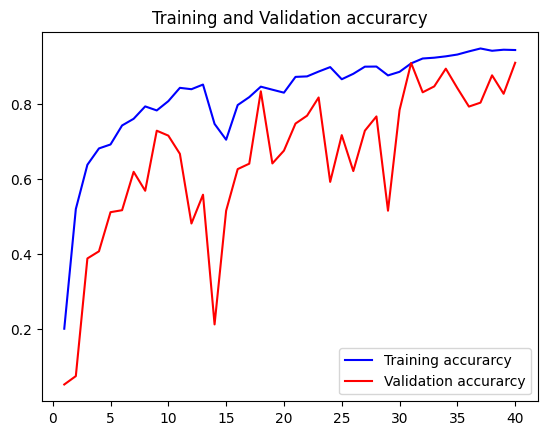

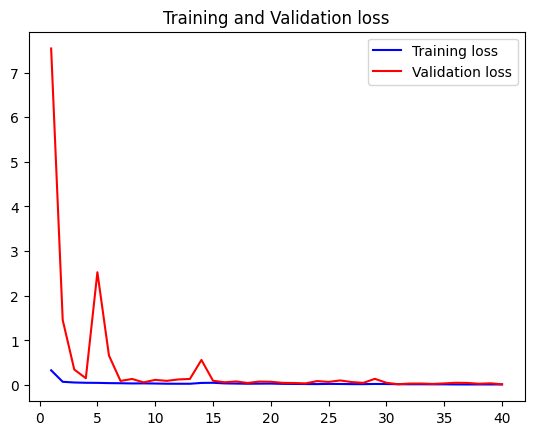

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Evaluating model accuracy by using the `evaluate` method

In [19]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
48/48 [==============================] - 19s 374ms/step - loss: 0.0156 - accuracy: 0.9102
Test Accuracy: 91.0163938999176


# Save Model

In [20]:
# Dump pickle file of the model
print("[INFO] Saving model...")
pickle.dump(model,open('plant_disease_classification_model.pkl', 'wb'))

[INFO] Saving model...
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_2
......vars
...layers\activation_3
......vars
...layers\activation_4
......vars
...layers\activation_5
......vars
...layers\activation_6
......vars
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_4
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_5
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
.

In [21]:
# Dump pickle file of the labels
print("[INFO] Saving label transform...")
filename = 'plant_disease_label_transform.pkl'
image_labels = pickle.load(open(filename, 'rb'))

[INFO] Saving label transform...


# Test Model


We write the following `predict_disease` function to predict the class or disease of a plant image. 

We just need to provide the complete path to the image and it displays the image along with its prediction class or plant disease.

In [22]:
def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    rst = model.predict(np_image)
    result =np.argmax(rst,axis=1)
    print((image_labels.classes_[result][0]))

For testing purposes, we randomly choose images from the dataset and try predicting class or disease of the plant image.

1/1 [==============================] - 0s 63ms/step
32


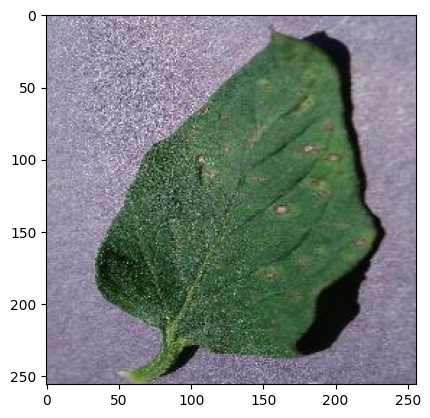

In [24]:
predict_disease('C:/Users/Faizan Tabassum/Desktop/GardenWatch/PlantVillage-Dataset/data_distribution_for_SVM/test/32/00baa868-ec23-41f3-a4f2-0e3d16be8895.JPG')

Potato___Early_blight


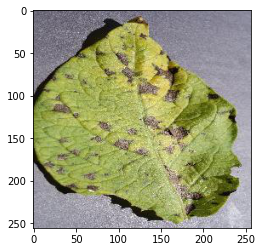

In [ ]:
predict_disease('/content/PlantVillage/val/Potato___Early_blight/03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG')

Tomato___Target_Spot


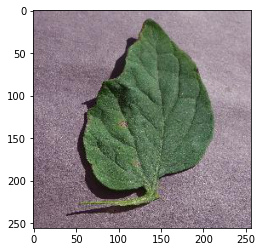

In [ ]:
predict_disease('/content/PlantVillage/val/Tomato___Target_Spot/1006b3dd-22d8-41b8-b83d-08bf189fcdaa___Com.G_TgS_FL 8118.JPG')

Orange___Haunglongbing_(Citrus_greening)


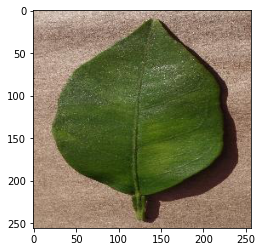

In [ ]:
predict_disease('/content/PlantVillage/val/Orange___Haunglongbing_(Citrus_greening)/02459e0c-a189-4dc9-a0dc-0548e36d0efb___CREC_HLB 5714.JPG')

# Reuse Model

Importing necessary libraries and modules required to build the classification model.

In [25]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

Load the trained model and its labels for prediction.

In [27]:
# Load model
filename = 'plant_disease_classification_model.pkl'
model = pickle.load(open(filename, 'rb'))

# Load labels
filename = 'plant_disease_label_transform.pkl'
image_labels = pickle.load(open(filename, 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-06-02 20:55:34        10061
metadata.json                                  2023-06-02 20:55:34           64
variables.h5                                   2023-06-02 20:55:34    232580024
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_2
......vars
...layers\activation_3
......vars
...layers\activation_4
......vars
...layers\activation_5
......vars
...layers\activation_6
......vars
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...

We use the `convert_image_to_array` function to resize an image and `predict_disease` function to predict the class or disease of a plant image.

We just need to provide the complete path to the image and it displays the image along with its prediction class or plant disease.

In [30]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((256, 256))

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    resulttemp = model.predict(np_image)
    result = np.argmax(resulttemp,axis=1)
    print((image_labels.classes_[result][0]))

Predict disease of any plant image.

1/1 [==============================] - 0s 143ms/step
2


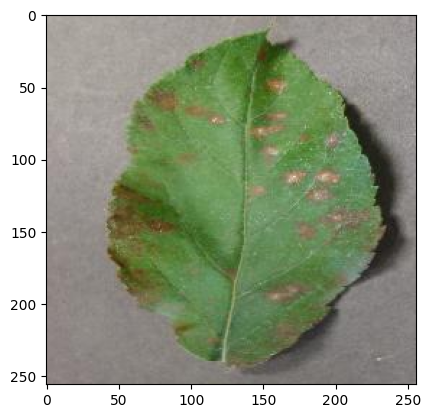

In [31]:
predict_disease('C:/Users/Faizan Tabassum/Desktop/GardenWatch/PlantVillage-Dataset/data_distribution_for_SVM/test/2/1ac2fcfb-92ad-4fda-9aa7-7e4450af6647.JPG')